In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
### RL Dataset 1 edit

dataset = np.genfromtxt('/home/augustsemrau/drive/bachelor/TGML/src/data/real/original_datasets/email_eu_core_temporal_og.csv', delimiter=' ')

## Remove datapoints the lie faar out timewise
dataset = dataset[dataset[:,2] < 5e7]
print(f'Length of reduced real life dataset: {len(dataset)}')

## Transform time-intervals
t_min = min(dataset[:,2])
t_max = max(dataset[:,2])
# t_max / 60 / 60 / 24
dataset[:,2] =  525.52 * ((dataset[:,2] - t_min) / t_max)

## Map node indices to the span of 0 to 986
for i in range(len(np.unique([dataset[:,0],dataset[:,1]]))):
    dataset[:,:2][dataset[:,:2].astype(int) == int(np.unique([dataset[:,0],dataset[:,1]])[i])] = i

df = pd.DataFrame(data=dataset)
df.to_csv('email_eu_core_temporal.csv', index=False, header=False)
df

Length of reduced real life dataset: 329910


525.5224305555556

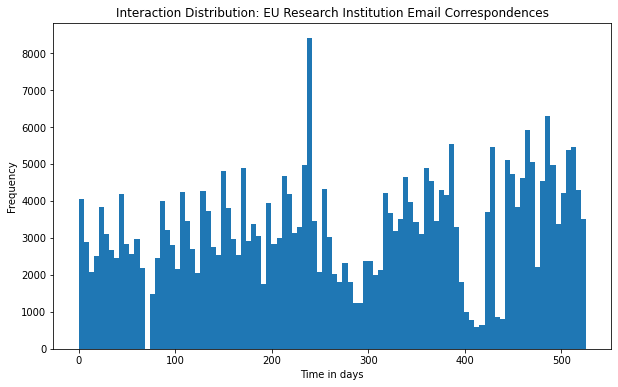

In [23]:
## Plotting distribution of RL dataset 1
dataset = np.genfromtxt('/home/augustsemrau/drive/bachelor/TGML/src/email_eu_core_temporal.csv', delimiter=',')

event_times = dataset[:,2].tolist()
fig, ax = plt.subplots(1,1, figsize=(10, 6), facecolor='w', edgecolor='k')
ax.hist(event_times, bins = 100)
ax.set_xlabel('Time in days')
ax.set_ylabel('Frequency')
ax.set_title('Interaction Distribution: EU Research Institution Email Correspondences')
plt.show()

In [19]:
### RL Dataset 2 edit
dataset = pd.read_csv('/home/augustsemrau/drive/bachelor/TGML/src/data/real/resistance_game4_og.csv', header=None)

## Convert into standard TDGN data format
## Create node pairs
pairs = []
for i in list(dataset.iloc[0])[1:]:
    pair = []
    if len(i) > len('P1_TO_P1'):
        pair.append(int(i[1]))
        pair.append(int(0))
    else:
        
        pair.append(int(i[1]))
        pair.append(int(i[-1]))
    pairs.append(pair)

## Create desired dataset
dataset_desired = []
for row in range(1,dataset.shape[0]):
    time = dataset.iloc[row][0]
    for i in range(1, len(pairs)+1):
        if int(dataset.iloc[row][i]) == 1:
            interaction = []
            interaction.append(pairs[i-1][0])
            interaction.append(pairs[i-1][1])
            interaction.append(time)
            dataset_desired.append(interaction)


## Transform time-intervals
dataset_desired = np.array(dataset_desired, dtype=np.float64)
t_min = min(dataset_desired[:,2])
t_max = max(dataset_desired[:,2])
dataset_desired[:,2] =  ((t_max / 60) / 3) * ((dataset_desired[:,2] - t_min) / t_max)

df = pd.DataFrame(data=dataset_desired)
df.to_csv('resistance_game4.csv', index=False, header=False)
df


,0,1,2
0,1.0,6.0,0.000000
1,2.0,6.0,0.000000
2,3.0,2.0,0.000000
3,4.0,6.0,0.000000
4,5.0,7.0,0.000000
...,...,...,...
58579,4.0,6.0,40.677778
58580,5.0,7.0,40.677778
58581,6.0,2.0,40.677778
58582,7.0,6.0,40.677778


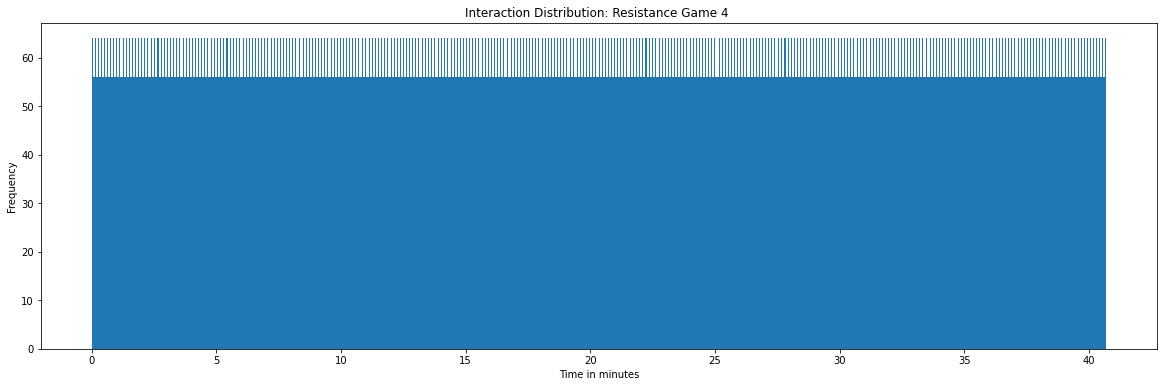

In [18]:
dataset = np.genfromtxt('/home/augustsemrau/drive/bachelor/TGML/src/resistance_game4.csv', delimiter=',')
event_times = dataset[:,2].tolist()
fig, ax = plt.subplots(1,1, figsize=(10, 6), facecolor='w', edgecolor='k')
ax.hist(event_times, bins = 1000)
ax.set_xlabel('Time in minutes')
ax.set_ylabel('Frequency')
ax.set_title('Interaction Distribution: Resistance Game 4 ')
plt.show()

In [113]:
### RL dataset 3 edit
dataset_og = np.genfromtxt('/home/augustsemrau/drive/bachelor/TGML/src/data/real/original_datasets/tij_pres_LyonSchool_og.csv', delimiter=' ')

## Remove datapoints the lie faar out timewise
dataset = np.copy(dataset_og)
dataset[:,0], dataset[:,1], dataset[:,2] = dataset_og[:,1], dataset_og[:,2], dataset_og[:,0]
dataset = dataset[dataset[:,2] < 80000]

## Transform time-intervals
t_min = min(dataset[:,2])
t_max = max(dataset[:,2])
dataset[:,2] =  (((t_max-t_min) / (3*60))) * ((dataset[:,2] - t_min) / t_max)

## Remove nodes not in the reduced dataset from metadata
meta_dataset = pd.read_csv('/home/augustsemrau/drive/bachelor/TGML/src/data/real/original_datasets/metadata_LyonSchool_og.csv', delimiter='	', header=None)
meta_dataset = meta_dataset.values.tolist()

meta_dataset_reduced = []
for row in meta_dataset:
    if int(row[0]) in list(np.unique([dataset[:,0],dataset[:,1]])):
        meta_dataset_reduced.append([int(row[0]), str(row[1])])

meta_dataset_reduced_array = np.array(meta_dataset_reduced)

## Map node class to int
class_dict = {}
for i in range(len(np.unique(meta_dataset_reduced_array[:,1]))):
    class_dict[np.unique(meta_dataset_reduced_array[:,1])[i]] = i

meta_dataset_reduced_array[:,1] = [class_dict[class_name] for class_name in meta_dataset_reduced_array[:,1]]
meta_dataset_reduced_array = meta_dataset_reduced_array.astype('int')

## Map node indices to the span of 0 to 236
indexes = np.copy(np.unique([dataset[:,0],dataset[:,1]]))
for i in range(len(indexes)):
    dataset[:,:2][dataset[:,:2].astype(int) == int(indexes[i])] = i
    meta_dataset_reduced_array[:,0][meta_dataset_reduced_array[:,0].astype(int) == int(indexes[i])] = i

## Map back to class string
class_dict_reverse = {}
for i in class_dict.items():
    class_dict_reverse[i[1]] = i[0]

meta_dataset_reduced_list = meta_dataset_reduced_array.tolist()
for row in meta_dataset_reduced_list:
    row[1] = class_dict_reverse[row[1]]

## Save to csv
df = pd.DataFrame(data=dataset)
df_meta = pd.DataFrame(data=meta_dataset_reduced_list)
df.to_csv('tij_pres_LyonSchool.csv', index=False, header=False)
df_meta.to_csv('metadata_LyonSchool.csv', index=False, header=False)

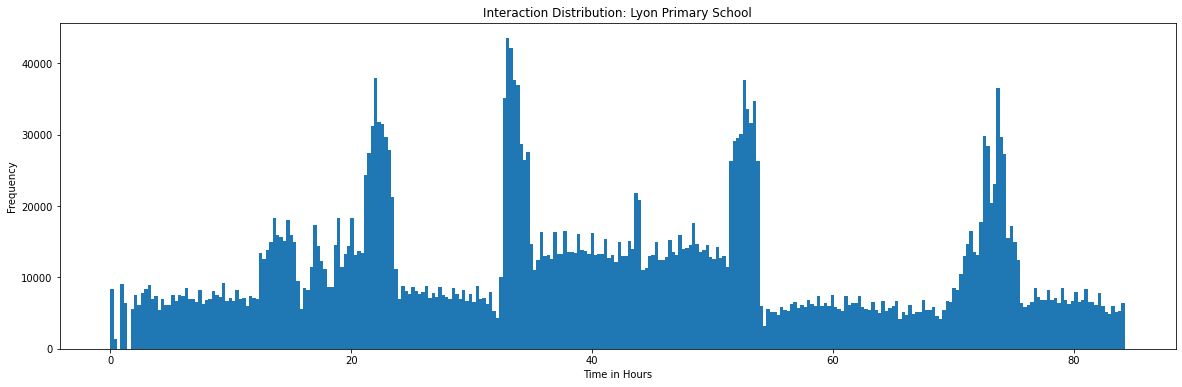

In [125]:
dataset = np.genfromtxt('/home/augustsemrau/drive/bachelor/TGML/src/data/real/edited_datasets/tij_pres_LyonSchool.csv', delimiter=',')
event_times = dataset[:,2].tolist()
fig, ax = plt.subplots(1,1, figsize=(20, 6), facecolor='w', edgecolor='k')
ax.hist(event_times, bins = 300)
ax.set_xlabel('Time in Hours')
ax.set_ylabel('Frequency')
ax.set_title('Interaction Distribution: Lyon Primary School')
plt.show()